In [1]:
import geopandas as gpd

africa_rivers = gpd.read_file("../../Nature/rivers/data/rivers/africa/a00000009.gdbtable")

print(africa_rivers)

         HYRIV_ID  NEXT_DOWN  MAIN_RIV  LENGTH_KM  DIST_DN_KM  DIST_UP_KM  \
0        10000001          0  10000001       0.89         0.0         7.2   
1        10000002          0  10000002       2.90         0.0         7.0   
2        10000003   10000009  10000009       4.63         5.7         9.8   
3        10000004   10000009  10000009       0.69         5.7         5.4   
4        10000005          0  10000005       8.32         0.0        13.6   
...           ...        ...       ...        ...         ...         ...   
1527546  11527547          0  11527547       3.11         0.0        20.9   
1527547  11527548          0  11527548       2.48         0.0         8.3   
1527548  11527549          0  11527549       0.69         0.0         6.1   
1527549  11527550   11527540  11527539       7.07        18.4        11.2   
1527550  11527551          0  11527551       4.99         0.0         9.5   

         CATCH_SKM  UPLAND_SKM  ENDORHEIC  DIS_AV_CMS  ORD_STRA  ORD_CLAS  

In [2]:
import matplotlib
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "gabriola"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"


In [3]:
lakes = gpd.read_file("../../PythonMapsData/NaturalEarth/10m_physical/ne_10m_lakes.shp")
lakes = lakes.loc[lakes['featurecla'] == 'Lake']
lakes = lakes.dropna(subset=['name'])

country_shapefiles = gpd.read_file("../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp")
africa = country_shapefiles.loc[country_shapefiles['CONTINENT'] == 'Africa']
africa_lakes = gpd.sjoin(lakes, africa, op='intersects')
africa_lakes = lakes.loc[lakes.index.isin(africa_lakes.index.tolist())]
excluded_rivers = gpd.sjoin(africa_rivers, africa_lakes, op='within')
africa_rivers = africa_rivers.loc[~africa_rivers.index.isin(excluded_rivers.index.tolist())]

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [4]:
print(africa_lakes)

    featurecla  scalerank             name       name_abb       name_alt  \
475       Lake          0      Lake Albert      L. Albert           None   
476       Lake          0      Lake Malawi      L. Malawi     Lake Nyasa   
477       Lake          0  Lake Tanganyika  L. Tanganyika           None   
478       Lake          0    Lake Victoria    L. Victoria           None   
479       Lake          1        Lake Chad        L. Chad           None   
482       Lake          1        Lake Tana        L. Tana           None   
491       Lake          3        Lac Moeru       L. Moeru     Lake Mweru   
499       Lake          4   Lake Bangweulu   L. Bangweulu           None   
502       Lake          4        Lake Kivu        L. Kivu           None   
503       Lake          4      Lake Edward      L. Edward           None   
543       Lake          5       Lake Kyoga       L. Kyoga           None   
544       Lake          5       Lake Rukwa       L. Rukwa           None   
560       La

In [5]:
africa_rivers = africa_rivers.loc[africa_rivers['ORD_FLOW'] < 8]

In [6]:
basins = gpd.read_file("../../Nature/rivers/data/basins/africa/hydrobasins_africa.shp")
print(basins)

      SUB_BAS  TO_BAS  MAJ_BAS       SUB_NAME            MAJ_NAME  SUB_AREA  \
0       90002    -888     7009         Borkou           Lake Chad   1179610   
1       30003   30272     7003   White Nile 5                Nile     97222   
2       90008    -888     7009         Dillia           Lake Chad    162385   
3       30029   30297     7003  Lake Victoria                Nile     69200   
4      100030    -888     7010     Lake Rukwa         Rift Valley      3443   
...       ...     ...      ...            ...                 ...       ...   
1445   153931    -999     7015        Comoros          Madasgacar      2257   
1446   153931    -999     7015        Comoros          Madasgacar      2257   
1447   220781    -999     7022        Cross 1      Gulf of Guinea     51730   
1448   210977    -999     7021         Saloum  Africa, West Coast     41540   
1449   210974    -999     7021       Scarcies  Africa, West Coast     29461   

      MAJ_AREA  LEGEND                             

In [7]:
import pandas as pd

colours_i_like = ['#A1CAF1',  '#875692', '#008856',  '#0067A5', '#BE0032',
                  '#222222', '#848482', '#F3C300',  'blue', '#F38400',
                  '#E68FAC', '#604E97', '#F3C300', '#B3446C', '#C2B280', 
                  '#F6A600', '#882D17', '#E25822', '#8DB600',
                  '#F99379',  '#DCD300', '#F3C300', '#E68FAC', '#C2B280',
                  '#222222']

print(len(colours_i_like))
colours_i_like = ['black', 'blue', '#808000', '#483d8b', '#dc143c',
                 '#000080', 'green', '#8b008b', '#ff4500', '#ffa500', '#008856', 
                 '#882D17', '#228B22', '#3cb371', '#875692', '#2f4f4f', '#0000ff',
                 '#ff00ff', '#1e90ff', '#db7093', '#ff1493', 'darkgreen', 
                 '#ee82ee', '#A1CAF1', 'orange',]

print(len(colours_i_like))

colors_df = pd.DataFrame({'basin': basins.MAJ_NAME.unique().tolist(), 'colors': colours_i_like})

25
25


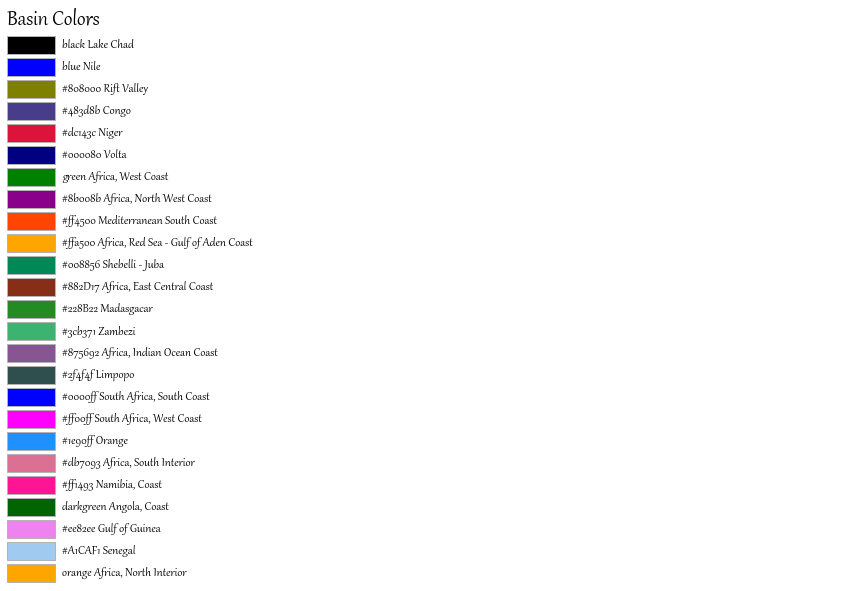

In [8]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


cell_width = 212
cell_height = 22
swatch_width = 48
margin = 12
topmargin = 40

n = len(colours_i_like)
ncols = 1
nrows = len(colours_i_like)
width = cell_width * 4 + 2 * margin
height = cell_height * nrows + margin + topmargin
dpi = 72

fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
fig.subplots_adjust(margin/width, margin/height,
                    (width-margin)/width, (height-topmargin)/height)
ax.set_xlim(0, cell_width * 4)
ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()
ax.set_title("Basin Colors", fontsize=24, loc="left", pad=10)

for i, (name, basin) in enumerate(zip(colours_i_like, basins.MAJ_NAME.unique().tolist())):
    row = i % nrows
    col = i // nrows
    y = row * cell_height

    swatch_start_x = cell_width * col
    text_pos_x = cell_width * col + swatch_width + 7

    ax.text(text_pos_x, y, (name + " " + basin), fontsize=14,
            horizontalalignment='left',
            verticalalignment='center')

    ax.add_patch(
        Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                  height=18, facecolor=name, edgecolor='0.7')
    )


C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


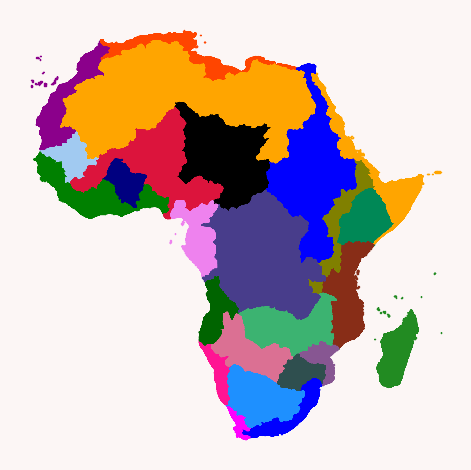

In [9]:
new_basins = pd.merge(basins, colors_df, left_on='MAJ_NAME', right_on='basin', how='left')

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
basins.plot(ax=ax, column='MAJ_NAME', edgecolor='face', color=new_basins['colors'])
ax.axis('off')
plt.tight_layout()

In [10]:
rivers_basins = gpd.sjoin(africa_rivers, new_basins, op='within')

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [11]:
import numpy as np

def scale_lw(df: gpd.GeoDataFrame, column_name: str, min_value: float, max_value: float):
    leftSpan = np.amax(df[column_name]) - np.amin(df[column_name])
    rightSpan = max_value - min_value
    valueScaled = (df[column_name] - np.amin(df[column_name])) / leftSpan
    df[f'LW_{column_name}'] = min_value + (valueScaled * rightSpan)
    return df

rivers_basins = scale_lw(rivers_basins, 'DIST_UP_KM', min_value=0.04, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'LENGTH_KM', min_value=0.04, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'CATCH_SKM', min_value=0.04, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'DIS_AV_CMS', min_value=0.04, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'UPLAND_SKM', min_value=0.04, max_value=0.4)

rivers_basins['LW_COMBINED'] = rivers_basins['LW_DIST_UP_KM'] +  rivers_basins['LW_LENGTH_KM']

In [12]:
from shapely.ops import unary_union


gdf = gpd.read_file('../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp')
africa = gdf.loc[gdf['CONTINENT'] == 'Africa']

x = unary_union(africa.geometry.tolist())
y = x.boundary
africa = gpd.GeoDataFrame(pd.DataFrame({'name': ['Africa']}), crs="EPSG:4326", geometry=[y])

In [13]:
logo = plt.imread('../../Branding/light_logo_1.png')


In [14]:
import matplotlib
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "gabriola"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"


C:\Users\symmy\AppData\Local\Temp\ipykernel_10168\1152729516.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


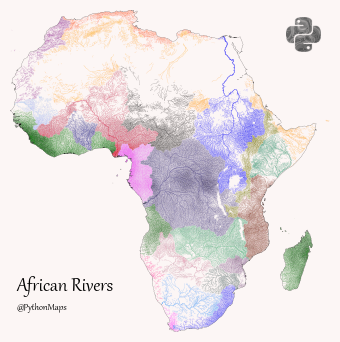

In [15]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')
africa.plot(ax=ax, color="black", lw=0.1)

newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.13, "African Rivers",
              size=16,
              color='black',
              transform = ax.transAxes)
txt = ax.text(0.02, 0.07, "@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes)

ax.set_ylim(-34.8, 37.4)
ax.set_xlim(-17.5, 54.4)
ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/africa_rivers_website.jpeg", dpi=600, bbox_inches='tight')
plt.show()

In [16]:
africa = gdf.loc[gdf['CONTINENT'] == 'Africa']
africa['boundary'] = africa.geometry.boundary
africa['geometry'] = africa['boundary'].copy()

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


C:\Users\symmy\AppData\Local\Temp\ipykernel_10168\2412549329.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


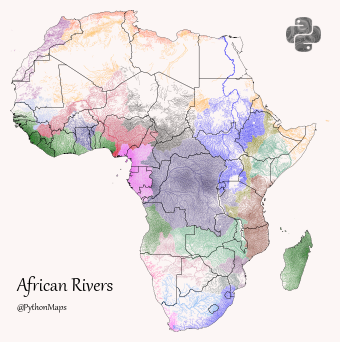

In [19]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')
africa.plot(ax=ax, color="black", lw=0.15)

newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.13, "African Rivers",
              size=16,
              color='black',
              transform = ax.transAxes)
txt = ax.text(0.02, 0.07, "@PythonMaps",
              size=8,
              color='black',
              transform = ax.transAxes)

ax.set_ylim(-34.8, 37.4)
ax.set_xlim(-17.5, 54.4)
ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/africa_rivers_website.jpeg", dpi=600, bbox_inches='tight')
plt.show()

In [18]:
=

SyntaxError: invalid syntax (1763773627.py, line 1)

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')
africa.plot(ax=ax, color="black", lw=0.1)

newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "African Rivers \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes)

ax.set_ylim(-34.8, 37.4)
ax.set_xlim(-17.5, 54.4)
ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/africa_rivers_low_res.png", dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')
africa.plot(ax=ax, color="black", lw=0.1)

newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "African Rivers \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes)

ax.set_ylim(-34.8, 37.4)
ax.set_xlim(-17.5, 54.4)
ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/africa_rivers_high_res.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')
africa.plot(ax=ax, color="black", lw=0.1)

newax = fig.add_axes([0.83, 0.62, 0.1, 0.1], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.02, 0.03, "African Rivers @PythonMaps\nData Source - hydrosheds.org",
              size=6,
              color='black',
              transform = ax.transAxes)

ax.set_ylim(-34.8, 37.4)
ax.set_xlim(-17.5, 54.4)
ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/africavc.png", dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
=

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(3.5, 7)


rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
africa_lakes.plot(ax=ax, color='#FCF6F5FF')
africa.plot(ax=ax, color="black", lw=0.1)
ax.set_ylim(-34.8, 37.4)
ax.set_xlim(-17.5, 54.4)
ax.axis('off')
plt.tight_layout()
plt.savefig("outputs/client_africa.png", dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
=

In [ ]:
africa_rivers = gpd.read_file("../../Nature/rivers/data/rivers/africa/a00000009.gdbtable")

print(africa_rivers)

In [ ]:
tmp_df = africa_rivers.loc[africa_rivers['ORD_FLOW'] < 8]

In [ ]:
leftSpan = np.amax(tmp_df['DIST_UP_KM']) - np.amin(tmp_df['DIST_UP_KM'])
rightSpan = 0.7 - 0.01
valueScaled = (tmp_df['DIST_UP_KM'] - np.amin(tmp_df['DIST_UP_KM'])) / leftSpan
tmp_df['lw'] = 0.01 + (valueScaled * rightSpan)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(5, 7)

tmp_df.plot(ax=ax, color='blue', lw=tmp_df['lw'])
africa_lakes.plot(ax=ax, color='blue', alpha=1)

ax.axis('off')

plt.savefig("outputs/africa10.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(5, 7)

tmp_df.plot(ax=ax, color='blue', lw=tmp_df['lw'])
africa_lakes.plot(ax=ax, color='blue', alpha=1)

ax.axis('off')
ax.set_ylim(-20, 20)
plt.savefig("outputs/africa11.png", dpi=600, bbox_inches='tight')
plt.show()